WEEK-14,ASS NO-04

Q1. What is Ridge Regression, and how does it differ from ordinary least squares regression?

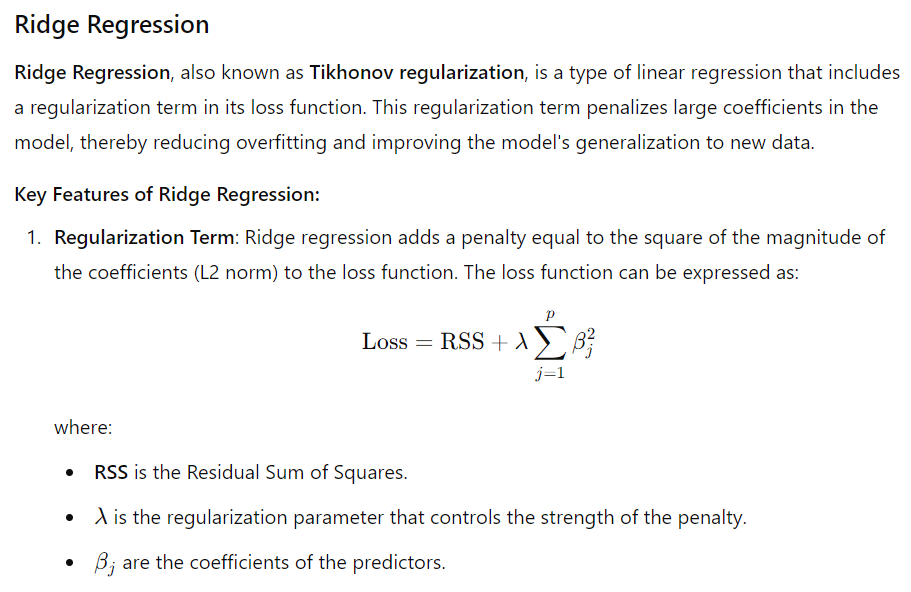

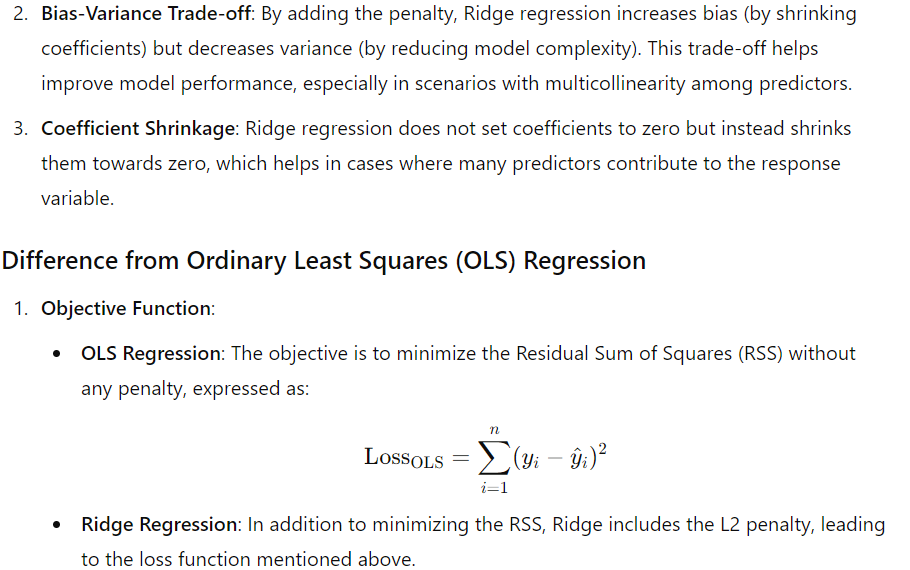

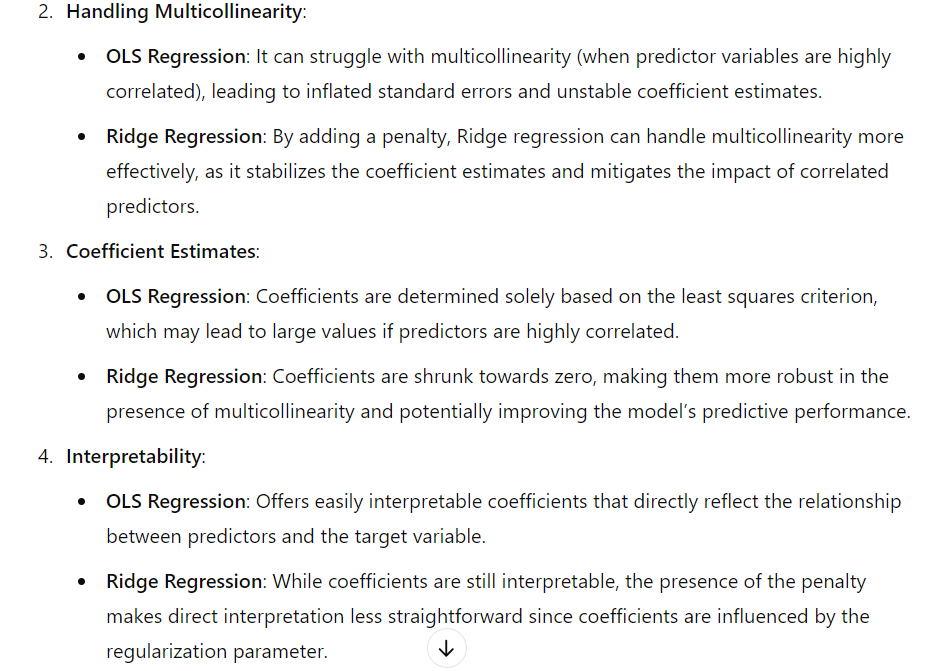

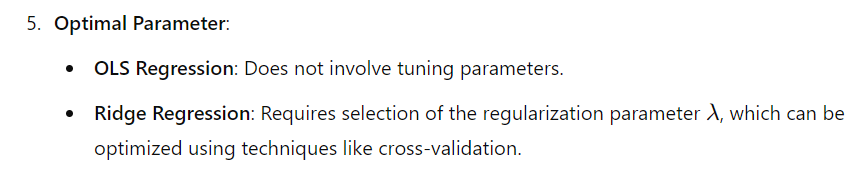

Q2. What are the assumptions of Ridge Regression?

Ridge regression, like ordinary least squares (OLS) regression, is based on several key assumptions that ensure the model produces valid and reliable results. Here are the main assumptions of ridge regression:

### 1. Linearity
- **Assumption**: The relationship between the predictors and the response variable is linear. This means that changes in the predictors lead to proportional changes in the response variable.
- **Implication**: If the true relationship is non-linear, ridge regression may not capture the underlying patterns effectively.

### 2. Independence
- **Assumption**: The observations in the dataset are independent of one another. In other words, the value of one observation does not affect another.
- **Implication**: If there is correlation between observations (e.g., time series data), it may violate this assumption and affect model performance.

### 3. Homoscedasticity
- **Assumption**: The variance of the residuals (errors) should be constant across all levels of the predictor variables. This means that the spread of the residuals should remain consistent for all values of the predictors.
- **Implication**: If the residuals exhibit heteroscedasticity (non-constant variance), it can lead to inefficient estimates and affect the validity of hypothesis tests.

### 4. Normality of Residuals
- **Assumption**: The residuals (errors) should be normally distributed. While ridge regression does not strictly require this assumption for estimation, it is important for hypothesis testing and confidence intervals.
- **Implication**: Non-normally distributed residuals can lead to inaccurate confidence intervals and p-values.

### 5. No Perfect Multicollinearity
- **Assumption**: While ridge regression is designed to handle multicollinearity better than OLS regression, it assumes that there is no perfect multicollinearity among the predictor variables. Perfect multicollinearity occurs when one predictor variable can be expressed as a linear combination of others.
- **Implication**: If perfect multicollinearity exists, it can lead to issues in estimating coefficients, even with ridge regression.

### 6. Scale of Predictors
- **Assumption**: The predictor variables should be on a similar scale. Ridge regression uses L2 regularization, which is sensitive to the scale of the variables.
- **Implication**: If predictors are on different scales, it may lead to biased coefficients. Standardizing or normalizing predictors before applying ridge regression is often recommended.

 

Q3. How do you select the value of the tuning parameter (lambda) in Ridge Regression?

Selecting the value of the tuning parameter \(\lambda\) in Ridge Regression is a crucial step, as it determines the strength of the regularization applied to the model. A suitable \(\lambda\) helps to balance the trade-off between fitting the training data and generalizing to unseen data. Here are common methods for selecting \(\lambda\):

### 1. Cross-Validation

**K-Fold Cross-Validation**:
- This is the most widely used method for selecting \(\lambda\). The dataset is divided into \(k\) subsets (folds). For each value of \(\lambda\):
  - The model is trained on \(k-1\) folds and tested on the remaining fold.
  - This process is repeated \(k\) times, with each fold serving as the test set once.
  - The average performance metric (e.g., Mean Squared Error, RMSE) across all folds is calculated.
- The value of \(\lambda\) that minimizes the average error is selected.

**Leave-One-Out Cross-Validation (LOOCV)**:
- A special case of k-fold cross-validation where \(k\) equals the number of observations. Each observation is used once as a test set while the rest serve as the training set.
- While this method provides a thorough assessment, it can be computationally intensive for large datasets.

### 2. Grid Search

- A grid search involves defining a range of \(\lambda\) values to explore (e.g., logarithmic scale from 0.001 to 100) and systematically evaluating the model's performance for each value using cross-validation.
- The value that results in the best performance metric is chosen.
  
### 3. Random Search

- Instead of searching through a grid of values, random search samples a fixed number of values from a defined range. This method can be more efficient than grid search, particularly for large parameter spaces.

### 4. Information Criteria

- **AIC (Akaike Information Criterion)** and **BIC (Bayesian Information Criterion)** can also be used for model selection. These criteria penalize model complexity and can help in selecting \(\lambda\) by balancing goodness of fit and model simplicity.

### 5. Regularization Path

- Some libraries (like `scikit-learn` in Python) allow for the computation of a regularization path, which gives the coefficients for a range of \(\lambda\) values. By analyzing how coefficients change as \(\lambda\) varies, you can gain insights into the effect of regularization on different predictors.

### 6. Validation Set Approach

- Another method is to split the data into a training set and a validation set (instead of k-fold cross-validation). The model is trained on the training set using various \(\lambda\) values, and the performance is evaluated on the validation set. This method, however, can be less reliable than k-fold cross-validation due to the reduced amount of training data.

   

Q4. Can Ridge Regression be used for feature selection? If yes, how?

Ridge Regression can be used for feature selection, but with some limitations. Unlike Lasso Regression, which can completely eliminate some coefficients by setting them to zero, Ridge Regression shrinks coefficients towards zero without eliminating them entirely. However, it can still assist in feature selection in the following ways:

### 1. Coefficient Shrinkage
- **Reduced Impact of Less Important Features**: Ridge Regression penalizes large coefficients through the L2 regularization term. As a result, less important features will have their coefficients shrunk significantly compared to more important features. This can help in identifying which features contribute more to the model's predictions by examining the magnitude of the coefficients.
  
### 2. Evaluating Coefficient Magnitudes
- **Ranked Feature Importance**: After fitting a Ridge Regression model, you can rank the features based on the absolute values of their coefficients. Features with smaller coefficients can be considered less important. While they won't be completely removed from the model, those with coefficients close to zero can be identified as candidates for exclusion or less focus in analysis.

### 3. Using Ridge Regression in Combination with Other Techniques
- **Combination with Lasso**: Some practitioners may use Ridge Regression followed by Lasso (known as Elastic Net). This approach allows for initial shrinkage of coefficients using Ridge, followed by feature selection using Lasso. Elastic Net combines the penalties of both L1 (Lasso) and L2 (Ridge) regularization, allowing for feature selection while managing multicollinearity.
  
### 4. Cross-Validation for Feature Selection
- **Model Evaluation**: By performing k-fold cross-validation, you can evaluate the model's performance with different subsets of features. Features that consistently yield better performance when included can be considered more important, while those that do not contribute to improved performance can be flagged for removal in subsequent modeling efforts.

### Limitations of Ridge Regression for Feature Selection

1. **No Zero Coefficients**: The primary limitation of Ridge Regression is that it does not set any coefficients to zero. Thus, while it can help identify less important features, it does not provide a clear binary selection (included/excluded) of features.

2. **Interpreting Coefficients**: Since Ridge shrinks coefficients rather than eliminating them, interpreting the model may become more complex, especially in understanding which predictors are genuinely influential.

3. **Multicollinearity Handling**: While Ridge is effective at addressing multicollinearity, if several features are highly correlated, it may retain all of them without providing clear guidance on which is the most informative.

 

Q5. How does the Ridge Regression model perform in the presence of multicollinearity?

Ridge Regression is specifically designed to address issues arising from multicollinearity among predictor variables. Here’s how it performs in such situations:

### 1. Mitigation of Multicollinearity Effects

- **Coefficient Stabilization**: In the presence of multicollinearity, the ordinary least squares (OLS) regression estimates can become unstable, leading to large standard errors and unreliable coefficient estimates. Ridge Regression mitigates this by adding an L2 regularization term to the loss function, which shrinks the coefficients of correlated predictors towards zero. This stabilization reduces the sensitivity of the estimates to changes in the data.

### 2. Improved Model Performance

- **Generalization**: By shrinking coefficients, Ridge Regression improves the model's ability to generalize to unseen data. It effectively reduces overfitting, which is a common problem when dealing with multicollinearity, as it allows the model to focus on the overall pattern rather than fitting the noise in the data.

### 3. Retaining All Predictors

- **No Feature Elimination**: Unlike Lasso Regression, which can set coefficients to zero and effectively remove predictors from the model, Ridge Regression retains all predictors. This means that while the coefficients may be shrunk, no information is discarded, allowing the model to leverage all available data.

### 4. Interpretation of Coefficients

- **Less Interpretable Coefficients**: Although Ridge Regression helps stabilize coefficients in the presence of multicollinearity, the interpretation becomes more complex. Since coefficients are shrunken, the estimated effect of a predictor on the response variable is less straightforward compared to OLS. Therefore, while the model may perform better, understanding the specific contribution of each predictor is not as clear.

### 5. Determining Feature Importance

- **Ranking Features**: After fitting a Ridge Regression model, the coefficients can be examined to rank the importance of features. Although all features are included, those with smaller coefficients can be considered less important. However, the presence of multicollinearity may still make it difficult to identify which specific predictors are truly driving the response variable, as correlated predictors may share the variance.

### 6. Hyperparameter Tuning

- **Selection of Lambda**: The effectiveness of Ridge Regression in managing multicollinearity is also dependent on the choice of the regularization parameter \(\lambda\). A well-tuned \(\lambda\) can significantly enhance model performance by appropriately balancing the trade-off between fitting the data and regularization. Cross-validation is typically employed to select the optimal \(\lambda\).

 

Q6. Can Ridge Regression handle both categorical and continuous independent variables?

Yes, Ridge Regression can handle both categorical and continuous independent variables. However, there are specific considerations to keep in mind when incorporating categorical variables into the model:

### 1. Handling Categorical Variables

- **Encoding Categorical Variables**: Since Ridge Regression requires numerical inputs, categorical variables need to be converted into numerical format before they can be used in the model. Common encoding methods include:
  - **One-Hot Encoding**: This method creates binary (0/1) columns for each category of a categorical variable. For example, if you have a variable "Color" with categories "Red," "Blue," and "Green," one-hot encoding would create three new columns: "Color_Red," "Color_Blue," and "Color_Green."
  - **Label Encoding**: This method assigns a unique integer to each category. However, this approach can introduce ordinal relationships that may not exist, so it's generally not recommended for nominal variables.
  - **Ordinal Encoding**: If the categorical variable has a meaningful order (e.g., "Low," "Medium," "High"), ordinal encoding can be used to preserve that order by assigning integers based on the rank.

### 2. Inclusion in Ridge Regression

- **Combining with Continuous Variables**: After encoding, the categorical variables can be combined with continuous variables in the feature set for Ridge Regression. The model treats all predictors, whether continuous or encoded categorical, equally during training.
  
### 3. Regularization and Categorical Variables

- **Coefficient Estimation**: Ridge Regression applies L2 regularization to all coefficients, including those corresponding to the encoded categorical variables. This means that even if a categorical variable has many levels (which results in many coefficients), the regularization will shrink them, potentially reducing the impact of less significant categories.

### 4. Model Complexity

- **Higher Dimensionality**: When using one-hot encoding for categorical variables, the model can become more complex due to the increase in dimensionality, especially if the categorical variable has many categories. This may increase the risk of overfitting, though Ridge's regularization helps to mitigate this.

### 5. Interpreting Coefficients

- **Interpreting Results**: When interpreting the coefficients for categorical variables in Ridge Regression, it's important to remember that they represent the change in the response variable relative to the reference category (often the first category in one-hot encoding). Coefficients for the encoded variables indicate how much the response variable changes when moving from the reference category to the respective category.

 

Q7. How do you interpret the coefficients of Ridge Regression?

Interpreting the coefficients of Ridge Regression involves understanding how the regularization affects the coefficients relative to the independent variables and the target variable. Here’s a detailed guide on how to interpret these coefficients:

### 1. Coefficient Interpretation

- **Magnitude and Direction**: Each coefficient in a Ridge Regression model represents the expected change in the response variable for a one-unit increase in the corresponding predictor variable, holding all other variables constant. 
  - **Positive Coefficient**: A positive coefficient indicates that as the predictor variable increases, the response variable is also expected to increase.
  - **Negative Coefficient**: A negative coefficient suggests that as the predictor variable increases, the response variable is expected to decrease.

### 2. Comparison with Ordinary Least Squares (OLS)

- **Shrinkage Effect**: In Ridge Regression, coefficients are shrunk towards zero compared to those estimated by OLS. This shrinkage occurs due to the L2 regularization term, which penalizes large coefficients. As a result, while interpreting coefficients, one must be aware that they may be smaller in magnitude than those from an OLS model, reflecting the impact of regularization.

### 3. Relative Importance of Features

- **Magnitude of Coefficients**: In Ridge Regression, the absolute values of the coefficients can be used to assess the relative importance of features. Larger absolute coefficients suggest that the predictor has a stronger influence on the response variable. However, since Ridge does not eliminate features (unlike Lasso), even smaller coefficients still indicate some level of influence.

### 4. Interaction with Categorical Variables

- **Categorical Variables**: For encoded categorical variables (e.g., using one-hot encoding), the coefficients represent the change in the response variable compared to a reference category. Each coefficient for a categorical variable indicates how the response changes when the variable is at a specific category compared to the reference category.

### 5. Multicollinearity Considerations

- **Correlated Predictors**: Ridge Regression is particularly effective in situations with multicollinearity (high correlation among predictors). In these cases, it is important to note that the coefficients might not be as easily interpretable because multiple correlated predictors can influence the estimated coefficients. The model captures the joint effect of correlated features rather than isolating their individual effects.

### 6. Practical Implications

- **Business or Contextual Interpretation**: When interpreting coefficients, it is essential to connect them back to the business context or research question. For example, in a sales prediction model, if a coefficient for "Advertising Spend" is 0.5, it can be interpreted as: "For every additional dollar spent on advertising, sales are expected to increase by $0.50, holding all other factors constant."

### 7. Caution on Absolute Values

- **Not for Direct Comparison**: When comparing coefficients between different features, caution is required, especially if the features are on different scales (e.g., income in dollars and age in years). Standardizing predictors (using z-scores) before fitting the model can help make the coefficients more directly comparable.
 

Q8. Can Ridge Regression be used for time-series data analysis? If yes, how?

Yes, Ridge Regression can be used for time series data analysis, but there are specific considerations and steps involved to ensure its effective application. Here’s how it can be applied in time series analysis:

### 1. Feature Engineering

- **Lagged Variables**: In time series analysis, the current value of a variable often depends on its previous values (lags). You can create lagged versions of the target variable and/or predictor variables. For example, if you are predicting the sales of a product, you can include the sales from the previous days or weeks as features.
  
- **Rolling Statistics**: Calculate rolling statistics (e.g., moving averages or rolling standard deviations) to capture trends and seasonality in the data. These can serve as additional predictors.

- **Time-Based Features**: Include time-based features such as month, day of the week, or season to capture seasonal effects. For example, sales may vary by season or specific days.

### 2. Handling Non-Stationarity

- **Differencing**: Many time series data sets are non-stationary, meaning their statistical properties (mean, variance) change over time. Differencing the series (subtracting the previous value from the current value) can help stabilize the mean and variance, making the data stationary.

- **Transformations**: Applying transformations (like logarithmic or square root transformations) can stabilize variance and improve the model's ability to fit the data.

### 3. Regularization for Overfitting

- **Addressing Multicollinearity**: In time series data, especially when many lagged variables are used, multicollinearity can be an issue. Ridge Regression can help mitigate this by penalizing the size of the coefficients, which is especially useful when many predictors are correlated.

- **Preventing Overfitting**: Ridge Regression helps prevent overfitting, which is crucial in time series analysis since overfitting can lead to poor predictive performance on unseen data. The regularization parameter \(\lambda\) can be tuned to find a good balance between bias and variance.

### 4. Model Training and Testing

- **Train-Test Split**: When using time series data, it is important to split the data chronologically into training and testing sets, rather than randomly. This reflects the real-world scenario where future observations cannot be known when predicting the past.

- **Cross-Validation**: Traditional k-fold cross-validation is not suitable for time series data because it can violate the temporal order. Instead, techniques such as time series cross-validation (or rolling forecasting origin) can be used, which respects the time ordering of observations.

### 5. Prediction

- **Fitting the Model**: Once the features have been engineered and the data prepared, Ridge Regression can be fitted to the training set. The model can then be used to make predictions on the test set.

- **Evaluation**: Evaluate the model's performance using appropriate metrics for time series, such as RMSE or MAE, to assess how well it predicts future values based on historical data.

### 6. Interpretation of Results

- **Understanding Coefficients**: Similar to other regression contexts, interpreting the coefficients in a Ridge Regression model applied to time series data requires understanding how changes in predictors (including lagged values) influence the response variable over time.
 